Here, we import the training set, do some preprocessing of the data, and extract the set of all possible features into variable X_train and the class labels into variable y_train. Also, we import packages that will be necessary down the line.

We also separate the labels into binary and multi-class labels.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


knn_acc = []

train = pd.read_csv("npf_train.csv")
train = train.set_index("date")
train = train.drop("id", axis = 1)
train = train.drop("partlybad", axis = 1)
event_bool = np.array(["nonevent", "event"])
train["class2"] = event_bool[(train["class4"]!="nonevent").astype(int)]
X_train = train.drop(["class2", "class4"], axis = 1)
y_train = train["class2"]

print(X_train.columns)
print(X_train.shape)
X_train.describe()

y_train_orig = y_train
y_train = y_train.replace(['event', 'nonevent'], [1, 0])

y_train.head()

ModuleNotFoundError: No module named 'pandas'

Below I do some exploratory data analysis, analyzing correlations of features, checking how different features trend with the differnet class labels

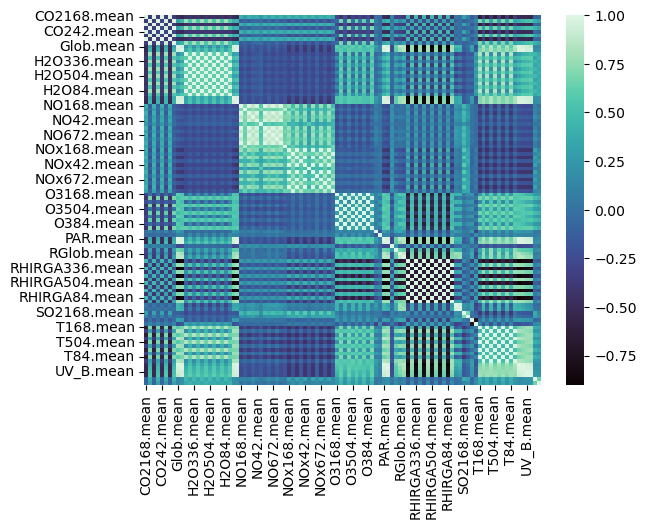

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = train.corr().round(2)
sns.heatmap(matrix, annot = False, cmap = "mako")
plt.savefig("corr_heatmap.png", bbox_inches = 'tight')
plt.show()

In [12]:
train.head()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,Ib,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,...,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035,event
2000-02-28,nonevent,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,...,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940,nonevent
2000-03-24,Ib,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,...,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191,event
2000-03-30,II,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,...,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466,event
2000-04-04,nonevent,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,...,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679,nonevent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,nonevent
2011-08-19,nonevent,383.698146,8.418351,384.052632,8.130389,386.436800,9.901536,384.105592,7.952936,332.744478,...,2.868514,16.352391,3.055122,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902,nonevent
2011-08-21,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,...,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457,nonevent


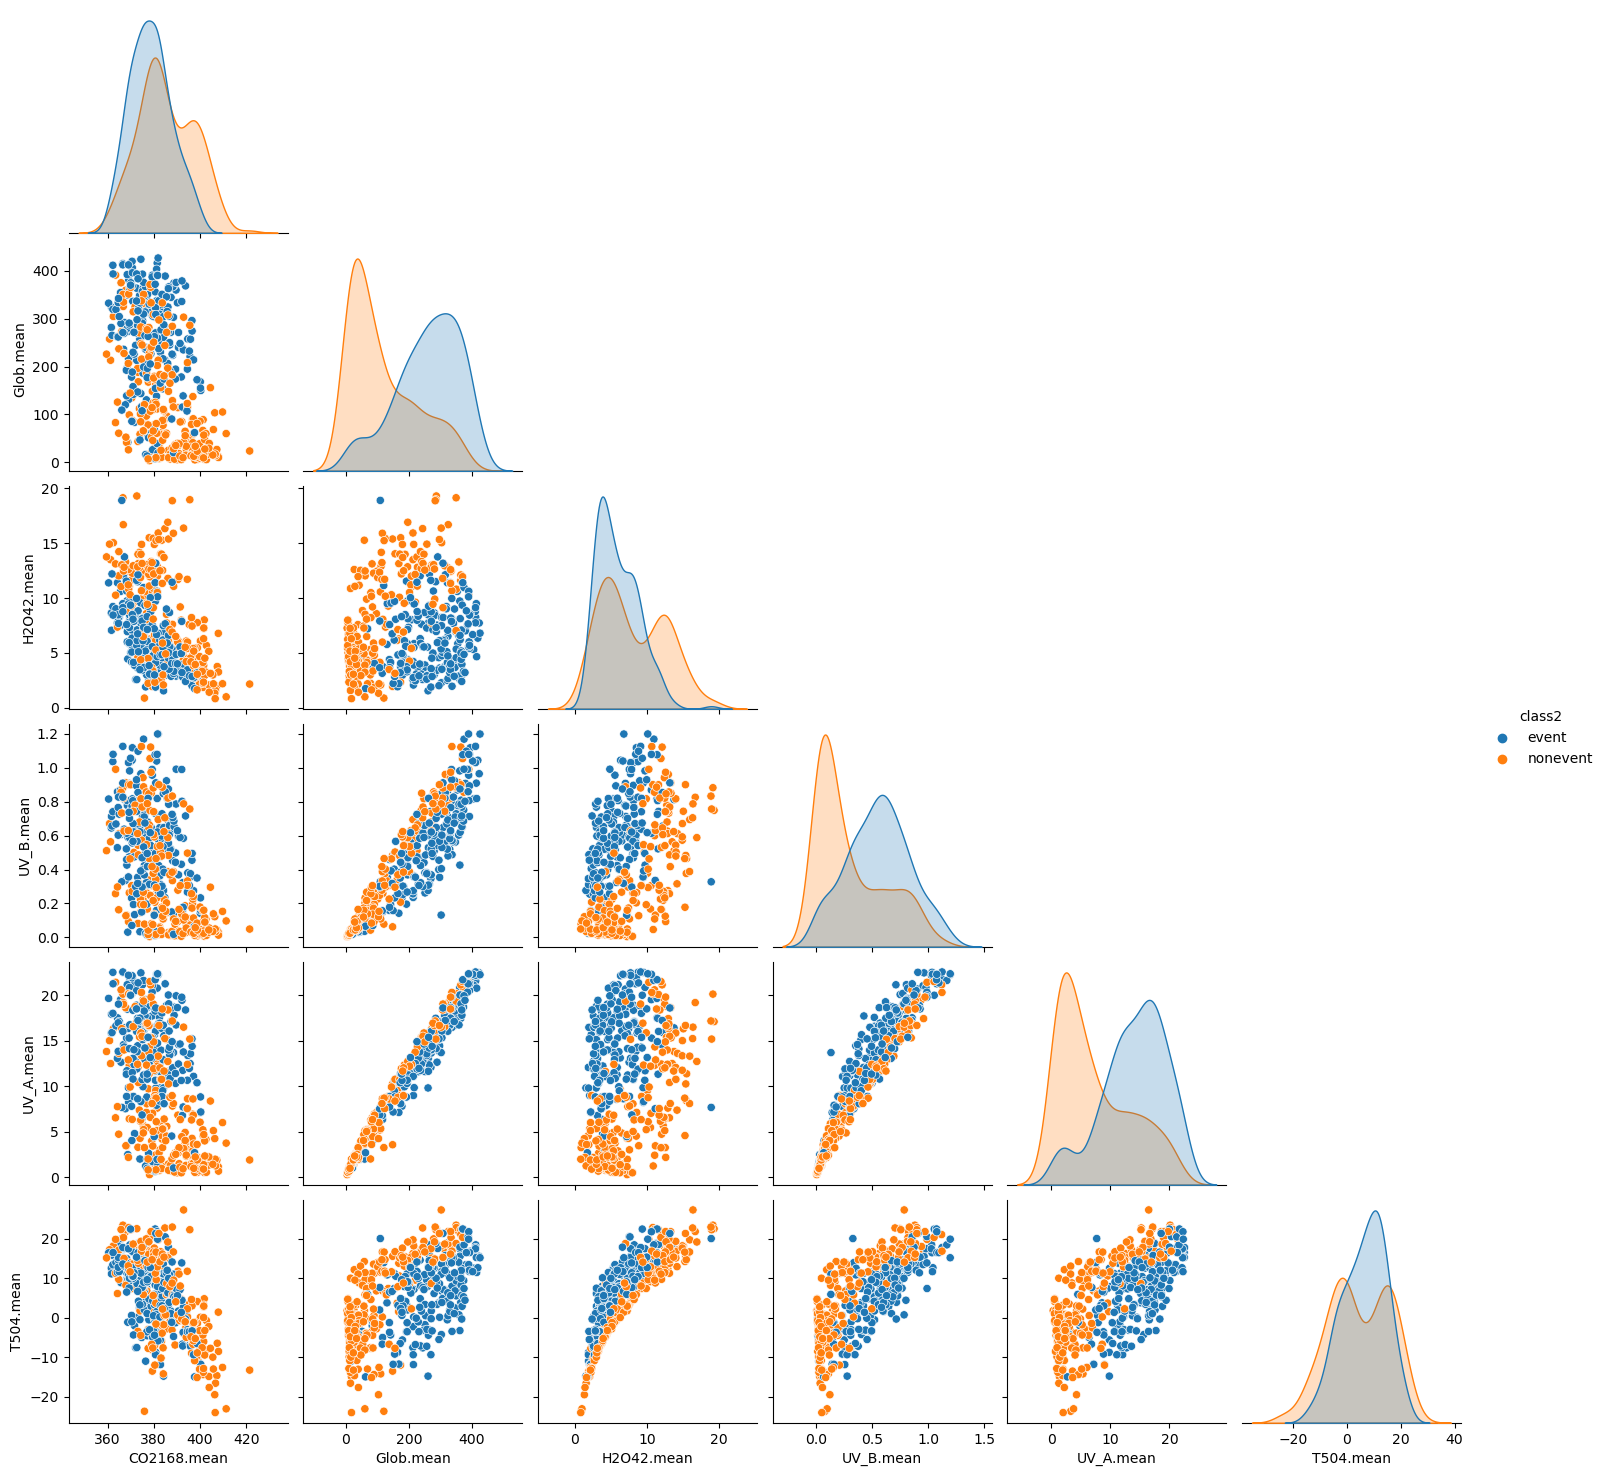

In [3]:
plot_df = train[['CO2168.mean', 'Glob.mean', 'H2O42.mean', 'UV_B.mean', 'UV_A.mean', 'T504.mean', 'class2']]

sns.pairplot(data = plot_df, corner = True, hue = "class2")
plt.savefig('2class_pairs.png', bbox_inches = 'tight')
plt.show()

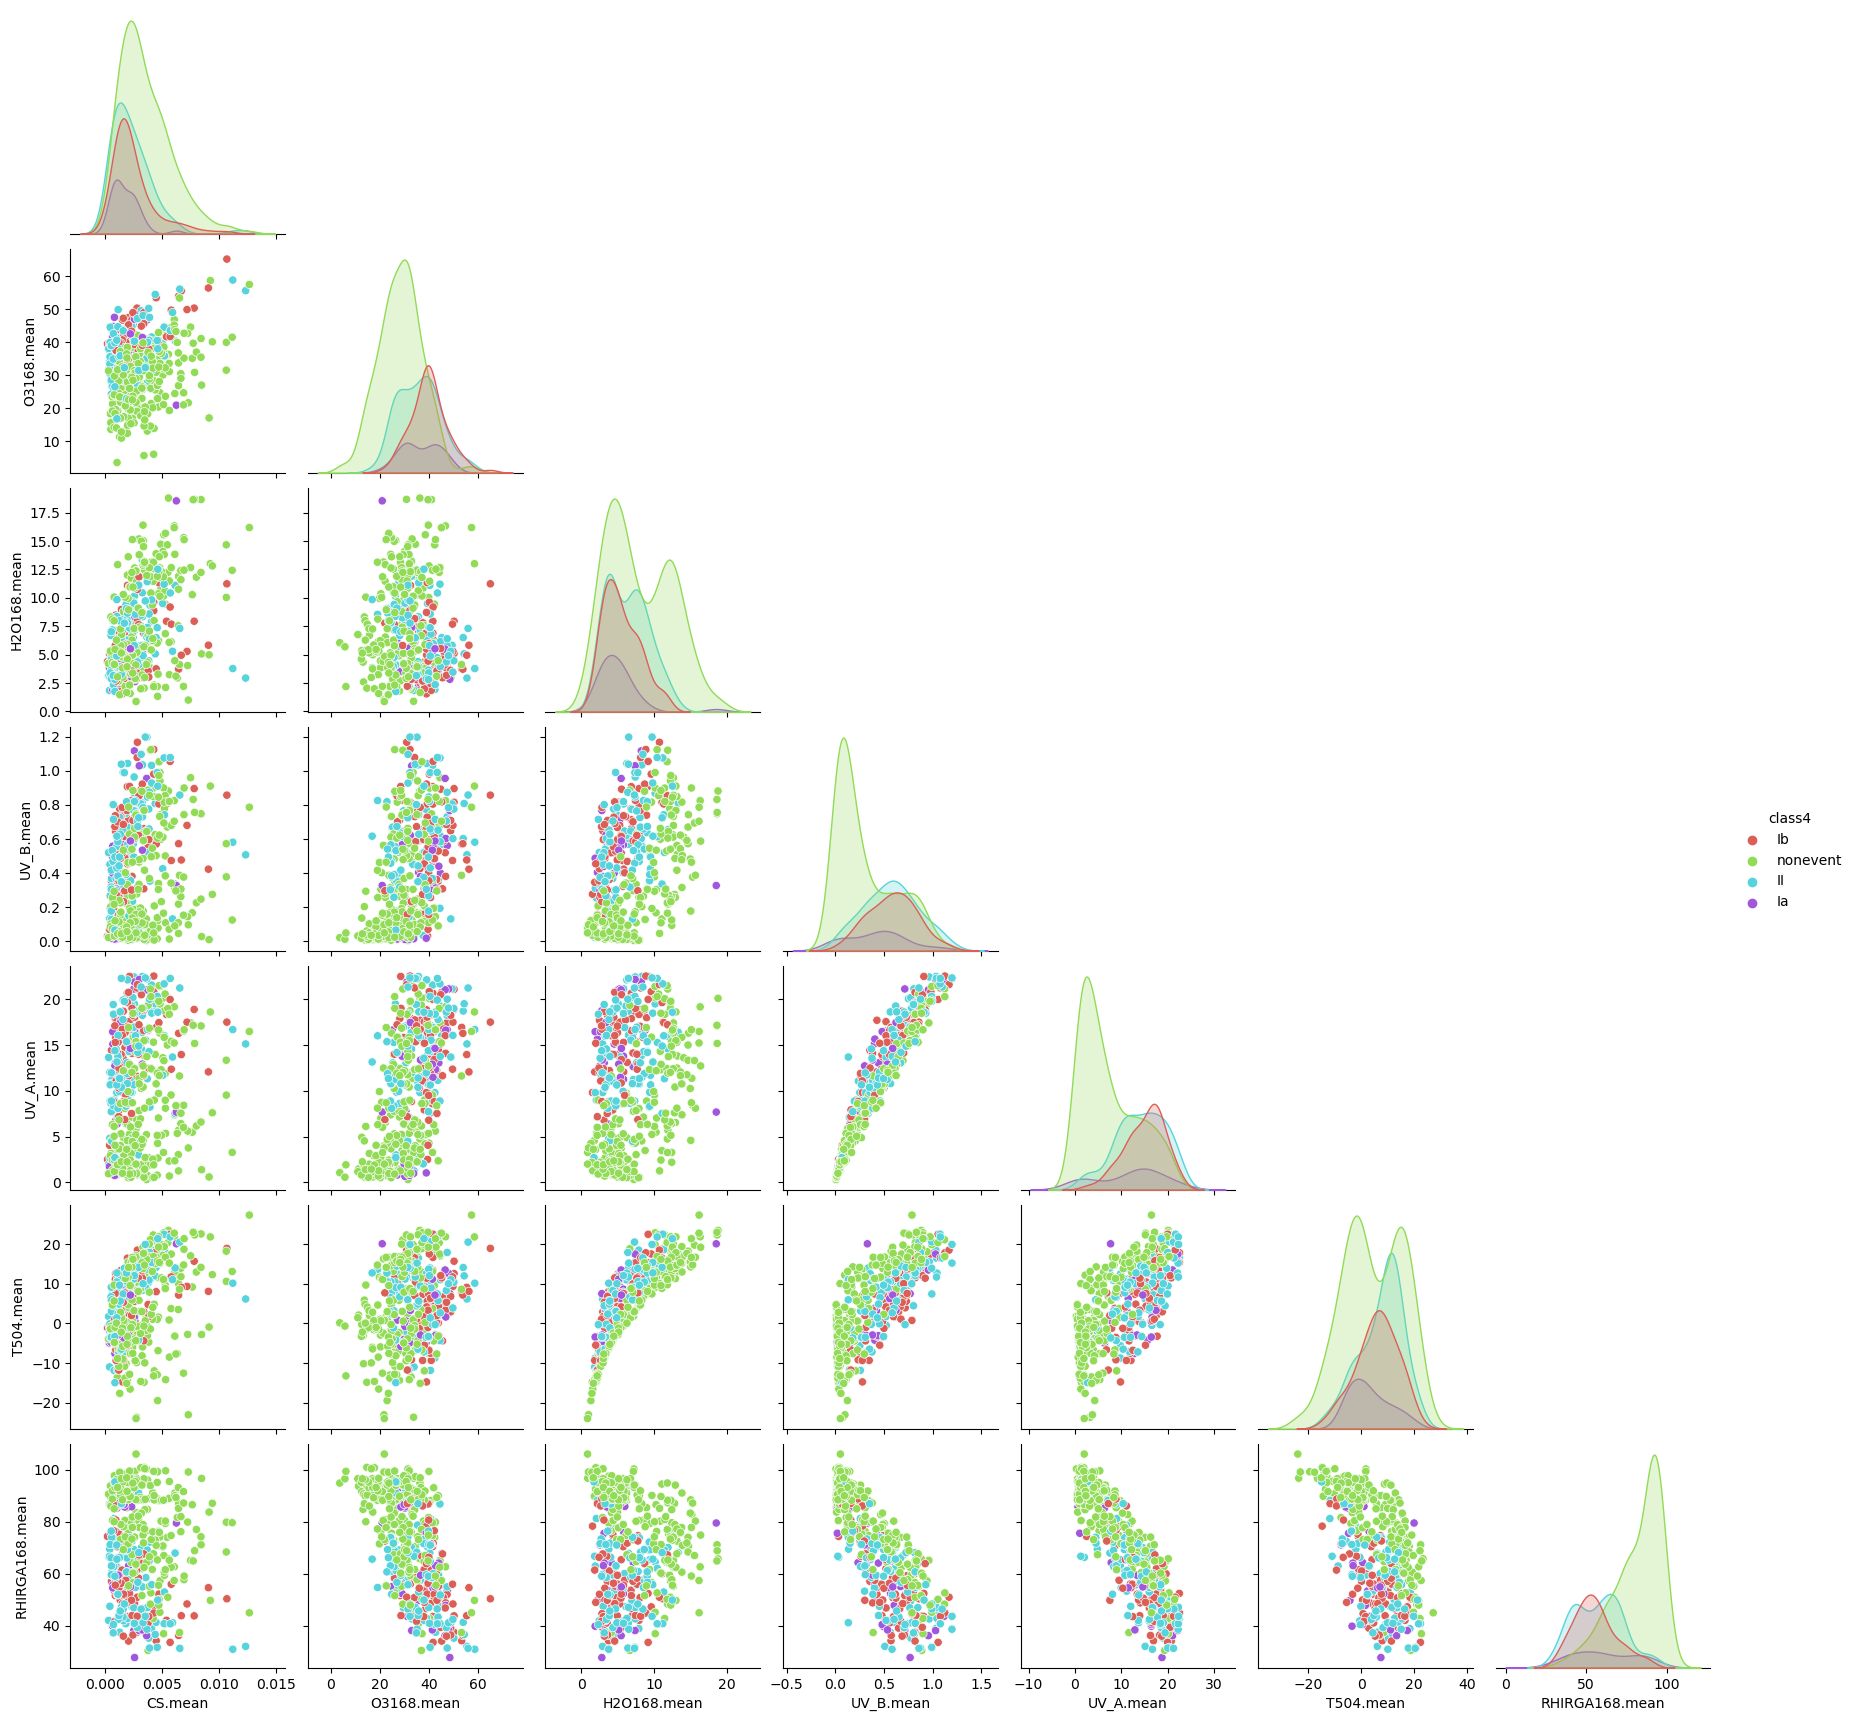

In [4]:
plot_df = train[['CS.mean', 'O3168.mean', 'H2O168.mean', 'UV_B.mean', 'UV_A.mean', 'T504.mean', 'RHIRGA168.mean', 'class4']]

sns.pairplot(data = plot_df, corner = True, hue = "class4", palette = "hls")
plt.savefig('4class_pairs.png', bbox_inches = 'tight')
plt.show()

Below I do model selection and feature selection, trying different models for the classifier. Due to time constraints, not all models' hyperparameters were thoroughly explored/optimized

In [2]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

k_features = []
k_features_names = []

lr = LogisticRegression()
multi = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
SVM = SVC(probability = True)

num_features = range(1, len(X_train.iloc[1]))
lr_CV_scores = []
multinom_CV_scores = []
multi_perp = []
SVM_CV_scores = []
SVM_perp = []
lr_perp = []
knn_CV_scores = []
rf_CV_scores = []
rf_perp = []
rf_param_list = []

rf_best_scores_num_features = []


for i in range(1, len(X_train.iloc[1])):
    select = SelectKBest(chi2, k = i)
    best_i_features = select.fit_transform(X_train_norm, y_train)
    k_features.append(pd.DataFrame(best_i_features))
    mask = select.get_support()
    k_features_names.append(X_train.columns[mask])
    
    k_folds = StratifiedKFold(n_splits = 5)
    
    lr_scores = cross_val_score(lr, best_i_features, y_train, cv = k_folds)
    lr_CV_scores.append(lr_scores.mean())
    lr.fit(best_i_features, y_train)
    lr_p = lr.predict_proba(best_i_features)[:,1]
    lr_perp.append(np.exp(-np.mean(np.log(np.multiply(y_train, lr_p) + np.multiply(1 - y_train, 1 - lr_p)))))
    
    SVM_scores = cross_val_score(SVM, best_i_features, y_train, cv = k_folds)
    SVM_CV_scores.append(SVM_scores.mean())
    SVM.fit(best_i_features, y_train)
    SVM_p = SVM.predict_proba(best_i_features)[:,1]
    SVM_perp.append(np.exp(-np.mean(np.log(np.multiply(y_train, SVM_p) + np.multiply(1 - y_train, 1 - SVM_p)))))
    
    multi_scores = cross_val_score(multi, best_i_features, y_train, cv = k_folds)
    multinom_CV_scores.append(multi_scores.mean())
    multi.fit(best_i_features, y_train)
    multi_p = multi.predict_proba(best_i_features)[:,1]
    multi_perp.append(np.exp(-np.mean(np.log(np.multiply(y_train, multi_p) + np.multiply(1 - y_train, 1 - multi_p)))))

    knn_model = KNeighborsClassifier(n_neighbors = 15)
    knn_scores = cross_val_score(knn_model, best_i_features, y_train, cv = k_folds)
    knn_CV_scores.append(knn_scores.mean())
    
    rf = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=84)
    rf_scores = cross_val_score(rf, best_i_features, y_train, cv = k_folds)
    rf_CV_scores.append(rf_scores.mean())
    rf.fit(best_i_features, y_train)
    rf_p = rf.predict_proba(best_i_features)[:,1]
    rf_perp.append(np.exp(-np.mean(np.log(np.multiply(y_train, rf_p) + np.multiply(1 - y_train, 1 - rf_p)))))
    

Using forward selection I decided on a model to optimize and found the number of features that would give the highest cross-validation accuracy

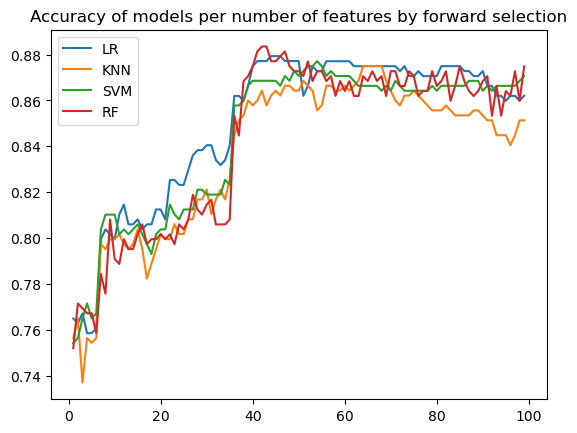

In [14]:
plt.plot(num_features, lr_CV_scores, label = "LR")
plt.plot(num_features, knn_CV_scores, label = "KNN")
plt.plot(num_features, SVM_CV_scores, label = "SVM")
plt.plot(num_features, rf_CV_scores, label = "RF")
plt.title("Accuracy of models per number of features by forward selection")
plt.legend()
plt.savefig("Acc_only.png")
plt.show()

Randomized search can help to tune the hyperparameters without exhaustively searching the entire grid

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameter_grid = {
    
    'bootstrap': [True],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4,5,6],
    'n_estimators': [84, 85, 86, 87, 90, 100]
}

rf2 = RandomForestClassifier()
rf_grid_search = RandomizedSearchCV(estimator = rf2, param_distributions = parameter_grid, n_iter = 500,
                                    cv = 5, random_state = 69, n_jobs = -1, verbose = 2)

grid_fit = rf_grid_search.fit(k_features[42], y_train)
print(grid_fit.best_score_)
print(grid_fit.best_params_)
print(grid_fit.best_estimator_)


Random Forest acheived the highest CV accuracy score with logistic regression and KNN close behind. Perplexity is another useful metric to gauge the generalizabilty of our model

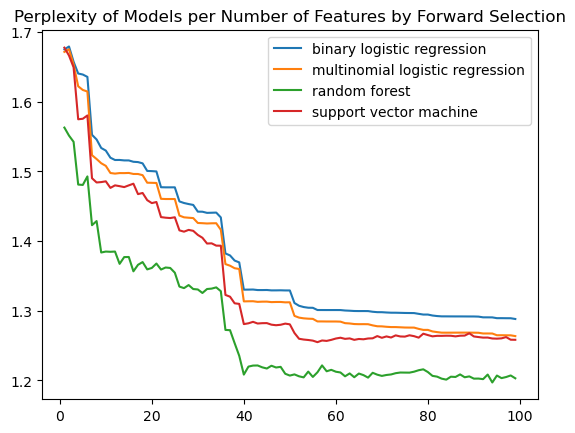

In [22]:
plt.plot(num_features, lr_perp, label = "binary logistic regression")
plt.plot(num_features, multi_perp, label = "multinomial logistic regression")
plt.plot(num_features, rf_perp, label = "random forest")
plt.plot(num_features, SVM_perp, label = "support vector machine")

plt.title("Perplexity of Models per Number of Features by Forward Selection")
plt.legend()
plt.savefig("perp_model_selection.png")
plt.show()


What follows is my use of the Random Forest classifier with the optimal feature subset and tuned hyperparameters tested on unseen features. Random Forest performed very good both in terms of cross validation score and perplexity. I didn't get around to it, but support vector machine would have been another model to try again once I had tuned the parameters. The project focused on binary classification, so I didn't have time to optimize a model for multi-label classification.

In [ ]:
rf_best_feature_subset = k_features[42]

rf_train_feature_names = pd.Series(k_features_names[42]).values
rf_X_train = train[rf_train_feature_names]

rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=90)
rf_multi = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=90)

rf.fit(rf_X_train, y_train)
rf_multi.fit(rf_X_train, train["class4"])

k_folds = StratifiedKFold(n_splits = 5)
rf_scores_fin = cross_val_score(rf, rf_best_feature_subset, y_train, cv = k_folds)
print("binary CV score:")
print(rf_scores_fin.mean())
rf_multi_scores_fin = cross_val_score(rf, rf_best_feature_subset, train["class4"], cv = k_folds)
print("multi CV score:")
print(rf_multi_scores_fin.mean())

print("binary perplexity:")
print(np.exp(-np.mean(np.log(np.multiply(y_train, rf.predict_proba(rf_X_train)[:,1]) + np.multiply(1 - y_train, 1 - rf.predict_proba(rf_X_train)[:,1])))))



test = pd.read_csv("npf_test_hidden.csv")
rf_test_feature_names = pd.Series(k_features_names[42]).values

print(rf_test_feature_names)


rf_X_test = test[rf_test_feature_names]

print("training predictions")
print("rf")
print(rf.predict(rf_X_test))
print("y_train")
print(np.array(y_train))
print()

print("test predictions:")

rf_pred = rf.predict(rf_X_test)
rf_multi_pred = rf_multi.predict(rf_X_test)
print(sum(rf_pred) / len(rf_pred))
print(rf_pred)
print(rf_multi_pred)


In [4]:
results = pd.DataFrame({
    "binary_pred": rf_pred,
    "binary_prob": rf.predict_proba(rf_X_test)[:,1],
    "binary_acc": rf_scores_fin.mean(),
    "multi_pred": rf_multi_pred,
    "multi_acc": rf_multi_scores_fin.mean()
})

In [5]:
results["binary_pred"] = results["binary_pred"].map({1: "event",
                                                    0: "nonevent"})

In [6]:
results.head()

,binary_pred,binary_prob,binary_acc,multi_pred,multi_acc
0,event,0.939046,0.874942,Ib,0.674497
1,nonevent,0.353210,0.874942,nonevent,0.674497
2,nonevent,0.060602,0.874942,nonevent,0.674497
3,nonevent,0.124475,0.874942,nonevent,0.674497
4,nonevent,0.024142,0.874942,nonevent,0.674497
...,...,...,...,...,...
960,event,0.888206,0.874942,Ib,0.674497
961,nonevent,0.028949,0.874942,nonevent,0.674497
962,event,0.912057,0.874942,Ib,0.674497
963,nonevent,0.046476,0.874942,nonevent,0.674497


In [12]:
real_test = pd.read_csv("npf_test.csv")

real_test["class2"] = event_bool[(real_test["class4"]!="nonevent").astype(int)]

y_test = real_test["class2"]
y_test = y_test.replace(['event', 'nonevent'], [1, 0])
y_test.head()

0    1
1    1
2    0
3    0
4    0
Name: class2, dtype: int64

In [18]:
rf.predict_proba(rf_X_train)[:,1].shape

(464,)

In [19]:
from sklearn.metrics import accuracy_score as acc

print("Binary accuracy:")
print(acc(rf_pred, y_test))
print("Perplexity:")
print(np.exp(-np.mean(np.log(np.multiply(y_test, rf.predict_proba(rf_X_test)[:,1]) + np.multiply(1 - y_test, 1 - rf.predict_proba(rf_X_test)[:,1])))))



Binary accuracy:
0.8580310880829015
Perplexity:
1.3864869434488043


In [20]:
acc_of_acc = (0.879289 - acc(rf_pred, y_test)) / 0.879289
print(acc_of_acc)

0.02417625139982244


In [28]:
results.to_csv("IML_project_challenge.csv")

In [29]:
test_in = pd.read_csv("IML_project_challenge.csv")

In [30]:
test_in.head()

,Unnamed: 0,binary_pred,binary_prob,binary_acc,multi_pred,multi_acc
0,0,event,0.889769,0.879289,Ib,0.659444
1,1,event,0.531945,0.879289,nonevent,0.659444
2,2,nonevent,0.068041,0.879289,nonevent,0.659444
3,3,nonevent,0.140046,0.879289,nonevent,0.659444
4,4,nonevent,0.030192,0.879289,nonevent,0.659444
...,...,...,...,...,...,...
960,960,event,0.828816,0.879289,Ib,0.659444
961,961,nonevent,0.013065,0.879289,nonevent,0.659444
962,962,event,0.936617,0.879289,II,0.659444
963,963,nonevent,0.021612,0.879289,nonevent,0.659444
